# Imports

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from ta.trend import TRIXIndicator
from ta.trend import WMAIndicator
from ta.trend import CCIIndicator
from ta.volume import money_flow_index
import pandas_ta as pta
from ta.trend import MACD
from ta.momentum import PercentagePriceOscillator
from ta.momentum import ROCIndicator
from ta.volume import ChaikinMoneyFlowIndicator
from ta.trend import ADXIndicator

In [2]:
import warnings
warnings.filterwarnings("ignore")


# Load Data

In [3]:
# List of stocks which should be in the training data

#stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'PYPL', 'INTC', 'ADBE']

stocks = ['MMM', 'ABT', 'ABBV', 'ACN', 'AYI', 'ADBE', 'AMD', 'AAP', 'AES', 'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANDV', 'ANSS', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'ADM', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BAC', 'BK', 'BAX', 'BDX', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'CHRW', 'CPB', 'COF', 'CAH', 'CBOE', 'KMX', 'CCL', 'CAT', 'CNC', 'CNP', 'CF', 'SCHW', 'CHTR', 'CHK', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'COO', 'GLW', 'COST', 'COTY', 'CCI', 'CSRA', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'DLR', 'DFS', 'DG', 'DLTR', 'D', 'DOV', 'DOW', 'DTE', 'DD', 'DUK', 'DXC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR', 'ETR', 'EVHC', 'EOG', 'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ES', 'EXC', 'EXPE', 'EXPD', 'ESRX', 'EXR', 'XOM', 'FFIV', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FE', 'FLS', 'FLR', 'FMC', 'FL', 'F', 'FTV', 'BEN', 'FCX', 'GPS', 'GRMN', 'IT', 'GD', 'GE', 'GIS', 'GM', 'GPC', 'GILD', 'GPN', 'GS', 'GT', 'GWW', 'HAL', 'HBI', 'HOG', 'HIG', 'HAS', 'HCA', 'HCP', 'HP', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HPQ', 'HUM', 'HBAN', 'IDXX', 'ITW', 'ILMN', 'IR', 'INTC', 'ICE', 'IBM', 'INCY', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IRM', 'JBHT', 'SJM', 'JNJ', 'JCI', 'JPM', 'JNPR', 'K', 'KEY', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KHC', 'KR', 'LH', 'LRCX', 'LEG', 'LEN', 'LLY', 'LNC', 'LKQ', 'LMT', 'L', 'LOW', 'LYB', 'MTB', 'MAC', 'M', 'MRO', 'MPC', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MAT', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MTD', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MHK', 'TAP', 'MDLZ', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'NDAQ', 'NOV', 'NAVI', 'NTAP', 'NFLX', 'NWL', 'NFX', 'NEM', 'NWSA', 'NWS', 'NEE', 'NKE', 'NI', 'JWN', 'NSC', 'NTRS', 'NOC', 'NRG', 'NUE', 'NVDA', 'ORLY', 'OXY', 'OMC', 'OKE', 'ORCL', 'PCAR', 'PKG', 'PH', 'PDCO', 'PAYX', 'PYPL', 'PNR', 'PEP', 'PRGO', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'RL', 'PPG', 'PPL', 'PX', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RRC', 'RJF', 'O', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RHI', 'ROK', 'COL', 'ROP', 'ROST', 'RCL', 'CRM', 'SCG', 'SLB', 'SNI', 'STX', 'SEE', 'SRE', 'SHW', 'SIG', 'SPG', 'SWKS', 'SLG', 'SNA', 'SO', 'LUV', 'SPGI', 'SWK', 'SBUX', 'STT', 'SRCL', 'SYK', 'STI', 'SYF', 'SNPS', 'SYY', 'TROW', 'TGT', 'TEL', 'FTI', 'TXN', 'TXT', 'TMO', 'TWX', 'TJX', 'TSCO', 'TDG', 'TRV', 'TRIP', 'FOXA', 'FOX', 'TSN', 'UDR', 'ULTA', 'USB', 'UA', 'UAA', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UHS', 'UNM', 'VFC', 'VLO', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'V', 'VNO', 'VMC', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'WEC', 'WFC', 'WDC', 'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WYNN', 'XEL', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']
print(len(stocks))

435


### Download data from Yahoo Finance

In [4]:
def download_stock_data(symbols):
    """
    Herunterladen von Aktiendaten mit yfinance und Speichern in CSV-Dateien.

    Parameter:
    - symbols: Eine Liste von Aktiensymbolen (z.B. ['AAPL', 'MSFT', 'GOOGL'])

    Rückgabewert:
    - None
    """
    for symbol in symbols:
        data = yf.download(symbol, start= '2018-01-01', end='2022-12-31')
        file_path = os.path.join('data', f'{symbol}.csv')
        data.to_csv(file_path)
        
        print(f'Aktiendaten für {symbol} heruntergeladen und in {file_path} gespeichert.')

In [5]:
download_stock_data(stocks)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für MMM heruntergeladen und in data/MMM.csv gespeichert.
Aktiendaten für ABT heruntergeladen und in data/ABT.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für ABBV heruntergeladen und in data/ABBV.csv gespeichert.
Aktiendaten für ACN heruntergeladen und in data/ACN.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für AYI heruntergeladen und in data/AYI.csv gespeichert.
Aktiendaten für ADBE heruntergeladen und in data/ADBE.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für AMD heruntergeladen und in data/AMD.csv gespeichert.
Aktiendaten für AAP heruntergeladen und in data/AAP.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Aktiendaten für AES heruntergeladen und in data/AES.csv gespeichert.
Aktiendaten für AET heruntergeladen und in data/AET.csv gespeichert.
Aktiendaten für AMG heruntergeladen und in data/AMG.csv gespeichert.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für AFL heruntergeladen und in data/AFL.csv gespeichert.
Aktiendaten für A heruntergeladen und in data/A.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für APD heruntergeladen und in data/APD.csv gespeichert.
Aktiendaten für AKAM heruntergeladen und in data/AKAM.csv gespeichert.
Aktiendaten für ALK heruntergeladen und in data/ALK.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Aktiendaten für ALB heruntergeladen und in data/ALB.csv gespeichert.
Aktiendaten für ARE heruntergeladen und in data/ARE.csv gespeichert.



[*********************100%%**********************]  1 of 1 completed


Aktiendaten für ALGN heruntergeladen und in data/ALGN.csv gespeichert.
Aktiendaten für ALLE heruntergeladen und in data/ALLE.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für LNT heruntergeladen und in data/LNT.csv gespeichert.
Aktiendaten für ALL heruntergeladen und in data/ALL.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für GOOGL heruntergeladen und in data/GOOGL.csv gespeichert.
Aktiendaten für GOOG heruntergeladen und in data/GOOG.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für MO heruntergeladen und in data/MO.csv gespeichert.
Aktiendaten für AMZN heruntergeladen und in data/AMZN.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für AEE heruntergeladen und in data/AEE.csv gespeichert.
Aktiendaten für AAL heruntergeladen und in data/AAL.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für AEP heruntergeladen und in data/AEP.csv gespeichert.
Aktiendaten für AXP heruntergeladen und in data/AXP.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für AIG heruntergeladen und in data/AIG.csv gespeichert.
Aktiendaten für AMT heruntergeladen und in data/AMT.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für AWK heruntergeladen und in data/AWK.csv gespeichert.
Aktiendaten für AMP heruntergeladen und in data/AMP.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed


Aktiendaten für AME heruntergeladen und in data/AME.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für AMGN heruntergeladen und in data/AMGN.csv gespeichert.
Aktiendaten für APH heruntergeladen und in data/APH.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Aktiendaten für ADI heruntergeladen und in data/ADI.csv gespeichert.
Aktiendaten für ANDV heruntergeladen und in data/ANDV.csv gespeichert.



[*********************100%%**********************]  1 of 1 completed


Aktiendaten für ANSS heruntergeladen und in data/ANSS.csv gespeichert.
Aktiendaten für AON heruntergeladen und in data/AON.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für AOS heruntergeladen und in data/AOS.csv gespeichert.
Aktiendaten für APA heruntergeladen und in data/APA.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für AIV heruntergeladen und in data/AIV.csv gespeichert.
Aktiendaten für AAPL heruntergeladen und in data/AAPL.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed


Aktiendaten für AMAT heruntergeladen und in data/AMAT.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für ADM heruntergeladen und in data/ADM.csv gespeichert.
Aktiendaten für AJG heruntergeladen und in data/AJG.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für AIZ heruntergeladen und in data/AIZ.csv gespeichert.
Aktiendaten für T heruntergeladen und in data/T.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Aktiendaten für ADSK heruntergeladen und in data/ADSK.csv gespeichert.
Aktiendaten für ADP heruntergeladen und in data/ADP.csv gespeichert.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für AZO heruntergeladen und in data/AZO.csv gespeichert.
Aktiendaten für AVB heruntergeladen und in data/AVB.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für AVY heruntergeladen und in data/AVY.csv gespeichert.
Aktiendaten für BAC heruntergeladen und in data/BAC.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für BK heruntergeladen und in data/BK.csv gespeichert.
Aktiendaten für BAX heruntergeladen und in data/BAX.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für BDX heruntergeladen und in data/BDX.csv gespeichert.
Aktiendaten für BBY heruntergeladen und in data/BBY.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für BIIB heruntergeladen und in data/BIIB.csv gespeichert.
Aktiendaten für BLK heruntergeladen und in data/BLK.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für HRB heruntergeladen und in data/HRB.csv gespeichert.
Aktiendaten für BA heruntergeladen und in data/BA.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für BWA heruntergeladen und in data/BWA.csv gespeichert.
Aktiendaten für BXP heruntergeladen und in data/BXP.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für BSX heruntergeladen und in data/BSX.csv gespeichert.
Aktiendaten für BHF heruntergeladen und in data/BHF.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für BMY heruntergeladen und in data/BMY.csv gespeichert.
Aktiendaten für AVGO heruntergeladen und in data/AVGO.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed


Aktiendaten für CHRW heruntergeladen und in data/CHRW.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für CPB heruntergeladen und in data/CPB.csv gespeichert.
Aktiendaten für COF heruntergeladen und in data/COF.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für CAH heruntergeladen und in data/CAH.csv gespeichert.
Aktiendaten für CBOE heruntergeladen und in data/CBOE.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für KMX heruntergeladen und in data/KMX.csv gespeichert.
Aktiendaten für CCL heruntergeladen und in data/CCL.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für CAT heruntergeladen und in data/CAT.csv gespeichert.
Aktiendaten für CNC heruntergeladen und in data/CNC.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für CNP heruntergeladen und in data/CNP.csv gespeichert.
Aktiendaten für CF heruntergeladen und in data/CF.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für SCHW heruntergeladen und in data/SCHW.csv gespeichert.
Aktiendaten für CHTR heruntergeladen und in data/CHTR.csv gespeichert.
Aktiendaten für CHK heruntergeladen und in data/CHK.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für CVX heruntergeladen und in data/CVX.csv gespeichert.
Aktiendaten für CMG heruntergeladen und in data/CMG.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für CB heruntergeladen und in data/CB.csv gespeichert.
Aktiendaten für CHD heruntergeladen und in data/CHD.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für CI heruntergeladen und in data/CI.csv gespeichert.
Aktiendaten für CINF heruntergeladen und in data/CINF.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für CTAS heruntergeladen und in data/CTAS.csv gespeichert.
Aktiendaten für CSCO heruntergeladen und in data/CSCO.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für C heruntergeladen und in data/C.csv gespeichert.
Aktiendaten für CFG heruntergeladen und in data/CFG.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für CLX heruntergeladen und in data/CLX.csv gespeichert.
Aktiendaten für CME heruntergeladen und in data/CME.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für CMS heruntergeladen und in data/CMS.csv gespeichert.
Aktiendaten für KO heruntergeladen und in data/KO.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für CTSH heruntergeladen und in data/CTSH.csv gespeichert.
Aktiendaten für CL heruntergeladen und in data/CL.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für CMCSA heruntergeladen und in data/CMCSA.csv gespeichert.
Aktiendaten für CMA heruntergeladen und in data/CMA.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für CAG heruntergeladen und in data/CAG.csv gespeichert.
Aktiendaten für COP heruntergeladen und in data/COP.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für ED heruntergeladen und in data/ED.csv gespeichert.
Aktiendaten für STZ heruntergeladen und in data/STZ.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für COO heruntergeladen und in data/COO.csv gespeichert.
Aktiendaten für GLW heruntergeladen und in data/GLW.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für COST heruntergeladen und in data/COST.csv gespeichert.
Aktiendaten für COTY heruntergeladen und in data/COTY.csv gespeichert.
Aktiendaten für CCI heruntergeladen und in data/CCI.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für CSRA heruntergeladen und in data/CSRA.csv gespeichert.
Aktiendaten für CSX heruntergeladen und in data/CSX.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für CMI heruntergeladen und in data/CMI.csv gespeichert.
Aktiendaten für CVS heruntergeladen und in data/CVS.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für DHI heruntergeladen und in data/DHI.csv gespeichert.
Aktiendaten für DHR heruntergeladen und in data/DHR.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für DRI heruntergeladen und in data/DRI.csv gespeichert.
Aktiendaten für DVA heruntergeladen und in data/DVA.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für DE heruntergeladen und in data/DE.csv gespeichert.
Aktiendaten für DAL heruntergeladen und in data/DAL.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für XRAY heruntergeladen und in data/XRAY.csv gespeichert.
Aktiendaten für DVN heruntergeladen und in data/DVN.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für DLR heruntergeladen und in data/DLR.csv gespeichert.
Aktiendaten für DFS heruntergeladen und in data/DFS.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für DG heruntergeladen und in data/DG.csv gespeichert.
Aktiendaten für DLTR heruntergeladen und in data/DLTR.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für D heruntergeladen und in data/D.csv gespeichert.
Aktiendaten für DOV heruntergeladen und in data/DOV.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für DOW heruntergeladen und in data/DOW.csv gespeichert.
Aktiendaten für DTE heruntergeladen und in data/DTE.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed


Aktiendaten für DD heruntergeladen und in data/DD.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für DUK heruntergeladen und in data/DUK.csv gespeichert.
Aktiendaten für DXC heruntergeladen und in data/DXC.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für EMN heruntergeladen und in data/EMN.csv gespeichert.
Aktiendaten für ETN heruntergeladen und in data/ETN.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für EBAY heruntergeladen und in data/EBAY.csv gespeichert.
Aktiendaten für ECL heruntergeladen und in data/ECL.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für EIX heruntergeladen und in data/EIX.csv gespeichert.
Aktiendaten für EW heruntergeladen und in data/EW.csv gespeichert.
Aktiendaten für EA heruntergeladen und in data/EA.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für EMR heruntergeladen und in data/EMR.csv gespeichert.
Aktiendaten für ETR heruntergeladen und in data/ETR.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für EVHC heruntergeladen und in data/EVHC.csv gespeichert.
Aktiendaten für EOG heruntergeladen und in data/EOG.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für EQT heruntergeladen und in data/EQT.csv gespeichert.
Aktiendaten für EFX heruntergeladen und in data/EFX.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für EQIX heruntergeladen und in data/EQIX.csv gespeichert.
Aktiendaten für EQR heruntergeladen und in data/EQR.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für ESS heruntergeladen und in data/ESS.csv gespeichert.
Aktiendaten für EL heruntergeladen und in data/EL.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed


Aktiendaten für ES heruntergeladen und in data/ES.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für EXC heruntergeladen und in data/EXC.csv gespeichert.
Aktiendaten für EXPE heruntergeladen und in data/EXPE.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für EXPD heruntergeladen und in data/EXPD.csv gespeichert.
Aktiendaten für ESRX heruntergeladen und in data/ESRX.csv gespeichert.
Aktiendaten für EXR heruntergeladen und in data/EXR.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für XOM heruntergeladen und in data/XOM.csv gespeichert.
Aktiendaten für FFIV heruntergeladen und in data/FFIV.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für FAST heruntergeladen und in data/FAST.csv gespeichert.
Aktiendaten für FRT heruntergeladen und in data/FRT.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für FDX heruntergeladen und in data/FDX.csv gespeichert.
Aktiendaten für FIS heruntergeladen und in data/FIS.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für FITB heruntergeladen und in data/FITB.csv gespeichert.
Aktiendaten für FE heruntergeladen und in data/FE.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für FLS heruntergeladen und in data/FLS.csv gespeichert.
Aktiendaten für FLR heruntergeladen und in data/FLR.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für FMC heruntergeladen und in data/FMC.csv gespeichert.
Aktiendaten für FL heruntergeladen und in data/FL.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für F heruntergeladen und in data/F.csv gespeichert.
Aktiendaten für FTV heruntergeladen und in data/FTV.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für BEN heruntergeladen und in data/BEN.csv gespeichert.
Aktiendaten für FCX heruntergeladen und in data/FCX.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für GPS heruntergeladen und in data/GPS.csv gespeichert.
Aktiendaten für GRMN heruntergeladen und in data/GRMN.csv gespeichert.
Aktiendaten für IT heruntergeladen und in data/IT.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Aktiendaten für GD heruntergeladen und in data/GD.csv gespeichert.



[*********************100%%**********************]  1 of 1 completed


Aktiendaten für GE heruntergeladen und in data/GE.csv gespeichert.
Aktiendaten für GIS heruntergeladen und in data/GIS.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für GM heruntergeladen und in data/GM.csv gespeichert.
Aktiendaten für GPC heruntergeladen und in data/GPC.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für GILD heruntergeladen und in data/GILD.csv gespeichert.
Aktiendaten für GPN heruntergeladen und in data/GPN.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für GS heruntergeladen und in data/GS.csv gespeichert.
Aktiendaten für GT heruntergeladen und in data/GT.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für GWW heruntergeladen und in data/GWW.csv gespeichert.
Aktiendaten für HAL heruntergeladen und in data/HAL.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für HBI heruntergeladen und in data/HBI.csv gespeichert.
Aktiendaten für HOG heruntergeladen und in data/HOG.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für HIG heruntergeladen und in data/HIG.csv gespeichert.
Aktiendaten für HAS heruntergeladen und in data/HAS.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für HCA heruntergeladen und in data/HCA.csv gespeichert.
Aktiendaten für HCP heruntergeladen und in data/HCP.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für HP heruntergeladen und in data/HP.csv gespeichert.
Aktiendaten für HSIC heruntergeladen und in data/HSIC.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für HSY heruntergeladen und in data/HSY.csv gespeichert.
Aktiendaten für HES heruntergeladen und in data/HES.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für HPE heruntergeladen und in data/HPE.csv gespeichert.
Aktiendaten für HLT heruntergeladen und in data/HLT.csv gespeichert.
Aktiendaten für HOLX heruntergeladen und in data/HOLX.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für HD heruntergeladen und in data/HD.csv gespeichert.
Aktiendaten für HON heruntergeladen und in data/HON.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für HRL heruntergeladen und in data/HRL.csv gespeichert.
Aktiendaten für HST heruntergeladen und in data/HST.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für HPQ heruntergeladen und in data/HPQ.csv gespeichert.
Aktiendaten für HUM heruntergeladen und in data/HUM.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für HBAN heruntergeladen und in data/HBAN.csv gespeichert.
Aktiendaten für IDXX heruntergeladen und in data/IDXX.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für ITW heruntergeladen und in data/ITW.csv gespeichert.
Aktiendaten für ILMN heruntergeladen und in data/ILMN.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für IR heruntergeladen und in data/IR.csv gespeichert.
Aktiendaten für INTC heruntergeladen und in data/INTC.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für ICE heruntergeladen und in data/ICE.csv gespeichert.
Aktiendaten für IBM heruntergeladen und in data/IBM.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für INCY heruntergeladen und in data/INCY.csv gespeichert.
Aktiendaten für IP heruntergeladen und in data/IP.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für IPG heruntergeladen und in data/IPG.csv gespeichert.
Aktiendaten für IFF heruntergeladen und in data/IFF.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für INTU heruntergeladen und in data/INTU.csv gespeichert.
Aktiendaten für ISRG heruntergeladen und in data/ISRG.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für IVZ heruntergeladen und in data/IVZ.csv gespeichert.
Aktiendaten für IRM heruntergeladen und in data/IRM.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für JBHT heruntergeladen und in data/JBHT.csv gespeichert.
Aktiendaten für SJM heruntergeladen und in data/SJM.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für JNJ heruntergeladen und in data/JNJ.csv gespeichert.
Aktiendaten für JCI heruntergeladen und in data/JCI.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für JPM heruntergeladen und in data/JPM.csv gespeichert.
Aktiendaten für JNPR heruntergeladen und in data/JNPR.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für K heruntergeladen und in data/K.csv gespeichert.
Aktiendaten für KEY heruntergeladen und in data/KEY.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für KMB heruntergeladen und in data/KMB.csv gespeichert.
Aktiendaten für KIM heruntergeladen und in data/KIM.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für KMI heruntergeladen und in data/KMI.csv gespeichert.
Aktiendaten für KLAC heruntergeladen und in data/KLAC.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für KSS heruntergeladen und in data/KSS.csv gespeichert.
Aktiendaten für KHC heruntergeladen und in data/KHC.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für KR heruntergeladen und in data/KR.csv gespeichert.
Aktiendaten für LH heruntergeladen und in data/LH.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für LRCX heruntergeladen und in data/LRCX.csv gespeichert.
Aktiendaten für LEG heruntergeladen und in data/LEG.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für LEN heruntergeladen und in data/LEN.csv gespeichert.
Aktiendaten für LLY heruntergeladen und in data/LLY.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für LNC heruntergeladen und in data/LNC.csv gespeichert.
Aktiendaten für LKQ heruntergeladen und in data/LKQ.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für LMT heruntergeladen und in data/LMT.csv gespeichert.
Aktiendaten für L heruntergeladen und in data/L.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für LOW heruntergeladen und in data/LOW.csv gespeichert.
Aktiendaten für LYB heruntergeladen und in data/LYB.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für MTB heruntergeladen und in data/MTB.csv gespeichert.
Aktiendaten für MAC heruntergeladen und in data/MAC.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für M heruntergeladen und in data/M.csv gespeichert.
Aktiendaten für MRO heruntergeladen und in data/MRO.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für MPC heruntergeladen und in data/MPC.csv gespeichert.
Aktiendaten für MAR heruntergeladen und in data/MAR.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für MMC heruntergeladen und in data/MMC.csv gespeichert.
Aktiendaten für MLM heruntergeladen und in data/MLM.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für MAS heruntergeladen und in data/MAS.csv gespeichert.
Aktiendaten für MA heruntergeladen und in data/MA.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Aktiendaten für MAT heruntergeladen und in data/MAT.csv gespeichert.



[*********************100%%**********************]  1 of 1 completed


Aktiendaten für MKC heruntergeladen und in data/MKC.csv gespeichert.
Aktiendaten für MCD heruntergeladen und in data/MCD.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für MCK heruntergeladen und in data/MCK.csv gespeichert.
Aktiendaten für MDT heruntergeladen und in data/MDT.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für MRK heruntergeladen und in data/MRK.csv gespeichert.
Aktiendaten für MET heruntergeladen und in data/MET.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für MTD heruntergeladen und in data/MTD.csv gespeichert.
Aktiendaten für MGM heruntergeladen und in data/MGM.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für MCHP heruntergeladen und in data/MCHP.csv gespeichert.
Aktiendaten für MU heruntergeladen und in data/MU.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für MSFT heruntergeladen und in data/MSFT.csv gespeichert.
Aktiendaten für MAA heruntergeladen und in data/MAA.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für MHK heruntergeladen und in data/MHK.csv gespeichert.
Aktiendaten für TAP heruntergeladen und in data/TAP.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Aktiendaten für MDLZ heruntergeladen und in data/MDLZ.csv gespeichert.
Aktiendaten für MNST heruntergeladen und in data/MNST.csv gespeichert.
Aktiendaten für MCO heruntergeladen und in data/MCO.csv gespeichert.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für MS heruntergeladen und in data/MS.csv gespeichert.
Aktiendaten für MOS heruntergeladen und in data/MOS.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für MSI heruntergeladen und in data/MSI.csv gespeichert.
Aktiendaten für NDAQ heruntergeladen und in data/NDAQ.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für NOV heruntergeladen und in data/NOV.csv gespeichert.
Aktiendaten für NAVI heruntergeladen und in data/NAVI.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für NTAP heruntergeladen und in data/NTAP.csv gespeichert.
Aktiendaten für NFLX heruntergeladen und in data/NFLX.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für NWL heruntergeladen und in data/NWL.csv gespeichert.
Aktiendaten für NFX heruntergeladen und in data/NFX.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für NEM heruntergeladen und in data/NEM.csv gespeichert.
Aktiendaten für NWSA heruntergeladen und in data/NWSA.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für NWS heruntergeladen und in data/NWS.csv gespeichert.
Aktiendaten für NEE heruntergeladen und in data/NEE.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für NKE heruntergeladen und in data/NKE.csv gespeichert.
Aktiendaten für NI heruntergeladen und in data/NI.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für JWN heruntergeladen und in data/JWN.csv gespeichert.
Aktiendaten für NSC heruntergeladen und in data/NSC.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für NTRS heruntergeladen und in data/NTRS.csv gespeichert.
Aktiendaten für NOC heruntergeladen und in data/NOC.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für NRG heruntergeladen und in data/NRG.csv gespeichert.
Aktiendaten für NUE heruntergeladen und in data/NUE.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für NVDA heruntergeladen und in data/NVDA.csv gespeichert.
Aktiendaten für ORLY heruntergeladen und in data/ORLY.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für OXY heruntergeladen und in data/OXY.csv gespeichert.
Aktiendaten für OMC heruntergeladen und in data/OMC.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für OKE heruntergeladen und in data/OKE.csv gespeichert.
Aktiendaten für ORCL heruntergeladen und in data/ORCL.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für PCAR heruntergeladen und in data/PCAR.csv gespeichert.
Aktiendaten für PKG heruntergeladen und in data/PKG.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für PH heruntergeladen und in data/PH.csv gespeichert.
Aktiendaten für PDCO heruntergeladen und in data/PDCO.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für PAYX heruntergeladen und in data/PAYX.csv gespeichert.
Aktiendaten für PYPL heruntergeladen und in data/PYPL.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für PNR heruntergeladen und in data/PNR.csv gespeichert.
Aktiendaten für PEP heruntergeladen und in data/PEP.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für PRGO heruntergeladen und in data/PRGO.csv gespeichert.
Aktiendaten für PFE heruntergeladen und in data/PFE.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für PCG heruntergeladen und in data/PCG.csv gespeichert.
Aktiendaten für PM heruntergeladen und in data/PM.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für PSX heruntergeladen und in data/PSX.csv gespeichert.
Aktiendaten für PNW heruntergeladen und in data/PNW.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für PXD heruntergeladen und in data/PXD.csv gespeichert.
Aktiendaten für PNC heruntergeladen und in data/PNC.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für RL heruntergeladen und in data/RL.csv gespeichert.
Aktiendaten für PPG heruntergeladen und in data/PPG.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für PPL heruntergeladen und in data/PPL.csv gespeichert.
Aktiendaten für PX heruntergeladen und in data/PX.csv gespeichert.
Aktiendaten für PFG heruntergeladen und in data/PFG.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für PG heruntergeladen und in data/PG.csv gespeichert.
Aktiendaten für PGR heruntergeladen und in data/PGR.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für PLD heruntergeladen und in data/PLD.csv gespeichert.
Aktiendaten für PRU heruntergeladen und in data/PRU.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für PEG heruntergeladen und in data/PEG.csv gespeichert.
Aktiendaten für PSA heruntergeladen und in data/PSA.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für PHM heruntergeladen und in data/PHM.csv gespeichert.
Aktiendaten für PVH heruntergeladen und in data/PVH.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für QRVO heruntergeladen und in data/QRVO.csv gespeichert.
Aktiendaten für PWR heruntergeladen und in data/PWR.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für QCOM heruntergeladen und in data/QCOM.csv gespeichert.
Aktiendaten für DGX heruntergeladen und in data/DGX.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für RRC heruntergeladen und in data/RRC.csv gespeichert.
Aktiendaten für RJF heruntergeladen und in data/RJF.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für O heruntergeladen und in data/O.csv gespeichert.
Aktiendaten für REG heruntergeladen und in data/REG.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für REGN heruntergeladen und in data/REGN.csv gespeichert.
Aktiendaten für RF heruntergeladen und in data/RF.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für RSG heruntergeladen und in data/RSG.csv gespeichert.
Aktiendaten für RMD heruntergeladen und in data/RMD.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für RHI heruntergeladen und in data/RHI.csv gespeichert.
Aktiendaten für ROK heruntergeladen und in data/ROK.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für COL heruntergeladen und in data/COL.csv gespeichert.
Aktiendaten für ROP heruntergeladen und in data/ROP.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für ROST heruntergeladen und in data/ROST.csv gespeichert.
Aktiendaten für RCL heruntergeladen und in data/RCL.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für CRM heruntergeladen und in data/CRM.csv gespeichert.
Aktiendaten für SCG heruntergeladen und in data/SCG.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für SLB heruntergeladen und in data/SLB.csv gespeichert.
Aktiendaten für SNI heruntergeladen und in data/SNI.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für STX heruntergeladen und in data/STX.csv gespeichert.
Aktiendaten für SEE heruntergeladen und in data/SEE.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für SRE heruntergeladen und in data/SRE.csv gespeichert.
Aktiendaten für SHW heruntergeladen und in data/SHW.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für SIG heruntergeladen und in data/SIG.csv gespeichert.
Aktiendaten für SPG heruntergeladen und in data/SPG.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für SWKS heruntergeladen und in data/SWKS.csv gespeichert.
Aktiendaten für SLG heruntergeladen und in data/SLG.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für SNA heruntergeladen und in data/SNA.csv gespeichert.
Aktiendaten für SO heruntergeladen und in data/SO.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für LUV heruntergeladen und in data/LUV.csv gespeichert.
Aktiendaten für SPGI heruntergeladen und in data/SPGI.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für SWK heruntergeladen und in data/SWK.csv gespeichert.
Aktiendaten für SBUX heruntergeladen und in data/SBUX.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für STT heruntergeladen und in data/STT.csv gespeichert.
Aktiendaten für SRCL heruntergeladen und in data/SRCL.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für SYK heruntergeladen und in data/SYK.csv gespeichert.
Aktiendaten für STI heruntergeladen und in data/STI.csv gespeichert.
Aktiendaten für SYF heruntergeladen und in data/SYF.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für SNPS heruntergeladen und in data/SNPS.csv gespeichert.
Aktiendaten für SYY heruntergeladen und in data/SYY.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für TROW heruntergeladen und in data/TROW.csv gespeichert.
Aktiendaten für TGT heruntergeladen und in data/TGT.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für TEL heruntergeladen und in data/TEL.csv gespeichert.
Aktiendaten für FTI heruntergeladen und in data/FTI.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für TXN heruntergeladen und in data/TXN.csv gespeichert.
Aktiendaten für TXT heruntergeladen und in data/TXT.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für TMO heruntergeladen und in data/TMO.csv gespeichert.
Aktiendaten für TWX heruntergeladen und in data/TWX.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für TJX heruntergeladen und in data/TJX.csv gespeichert.
Aktiendaten für TSCO heruntergeladen und in data/TSCO.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für TDG heruntergeladen und in data/TDG.csv gespeichert.
Aktiendaten für TRV heruntergeladen und in data/TRV.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für TRIP heruntergeladen und in data/TRIP.csv gespeichert.
Aktiendaten für FOXA heruntergeladen und in data/FOXA.csv gespeichert.
Aktiendaten für FOX heruntergeladen und in data/FOX.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für TSN heruntergeladen und in data/TSN.csv gespeichert.
Aktiendaten für UDR heruntergeladen und in data/UDR.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für ULTA heruntergeladen und in data/ULTA.csv gespeichert.
Aktiendaten für USB heruntergeladen und in data/USB.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für UA heruntergeladen und in data/UA.csv gespeichert.
Aktiendaten für UAA heruntergeladen und in data/UAA.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für UNP heruntergeladen und in data/UNP.csv gespeichert.
Aktiendaten für UAL heruntergeladen und in data/UAL.csv gespeichert.
Aktiendaten für UNH heruntergeladen und in data/UNH.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für UPS heruntergeladen und in data/UPS.csv gespeichert.
Aktiendaten für URI heruntergeladen und in data/URI.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für UHS heruntergeladen und in data/UHS.csv gespeichert.
Aktiendaten für UNM heruntergeladen und in data/UNM.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für VFC heruntergeladen und in data/VFC.csv gespeichert.
Aktiendaten für VLO heruntergeladen und in data/VLO.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für VTR heruntergeladen und in data/VTR.csv gespeichert.
Aktiendaten für VRSN heruntergeladen und in data/VRSN.csv gespeichert.
Aktiendaten für VRSK heruntergeladen und in data/VRSK.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für VZ heruntergeladen und in data/VZ.csv gespeichert.
Aktiendaten für VRTX heruntergeladen und in data/VRTX.csv gespeichert.
Aktiendaten für V heruntergeladen und in data/V.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für VNO heruntergeladen und in data/VNO.csv gespeichert.
Aktiendaten für VMC heruntergeladen und in data/VMC.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für WMT heruntergeladen und in data/WMT.csv gespeichert.
Aktiendaten für WBA heruntergeladen und in data/WBA.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für DIS heruntergeladen und in data/DIS.csv gespeichert.
Aktiendaten für WM heruntergeladen und in data/WM.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für WAT heruntergeladen und in data/WAT.csv gespeichert.
Aktiendaten für WEC heruntergeladen und in data/WEC.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für WFC heruntergeladen und in data/WFC.csv gespeichert.
Aktiendaten für WDC heruntergeladen und in data/WDC.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für WU heruntergeladen und in data/WU.csv gespeichert.
Aktiendaten für WRK heruntergeladen und in data/WRK.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für WY heruntergeladen und in data/WY.csv gespeichert.
Aktiendaten für WHR heruntergeladen und in data/WHR.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für WMB heruntergeladen und in data/WMB.csv gespeichert.
Aktiendaten für WYNN heruntergeladen und in data/WYNN.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für XEL heruntergeladen und in data/XEL.csv gespeichert.
Aktiendaten für XRX heruntergeladen und in data/XRX.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für XYL heruntergeladen und in data/XYL.csv gespeichert.
Aktiendaten für YUM heruntergeladen und in data/YUM.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für ZBH heruntergeladen und in data/ZBH.csv gespeichert.
Aktiendaten für ZION heruntergeladen und in data/ZION.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed

Aktiendaten für ZTS heruntergeladen und in data/ZTS.csv gespeichert.


### Create dataframes for each stock

In [6]:
def create_dataframes():
    """
    Erstellt pro CSV-Datei einen DataFrame mit dem Namen der Aktie.

    Rückgabewert:
    - dataframes: Ein Dictionary, das die DataFrames enthält, wobei die Schlüssel die Aktiennamen sind.
    """
    dataframes = {}
    data_folder = 'data'

    # Durchlaufen aller CSV-Dateien im `data`-Ordner
    for file_name in os.listdir(data_folder):
        if file_name.endswith('.csv'):
            # Aktienname aus dem Dateinamen extrahieren (ohne '.csv')
            stock_name = os.path.splitext(file_name)[0]
            
            # DataFrame aus der CSV-Datei erstellen und im Dictionary speichern
            df = pd.read_csv(os.path.join(data_folder, file_name))
            dataframes[stock_name] = df
    return dataframes

# Beispielaufruf
dataframes = create_dataframes()
print(dataframes.keys())  # Ausgabe der Aktiennamen, die als Schlüssel im Dictionary gespeichert sind


dict_keys(['CSCO', 'UAL', 'TROW', 'ISRG', 'PRGO', 'DVN', 'MRO', 'BA', 'VRTX', 'GILD', 'EQIX', 'MDT', 'V', 'QRVO', 'A', 'FOX', 'MO', 'SWKS', 'MCHP', 'CHTR', 'EIX', 'BBY', 'WBA', 'HCA', 'AJG', 'DTE', 'C', 'T', 'CF', 'MGM', 'HUM', 'CBOE', 'CFG', 'WU', 'APH', 'SYY', 'MSI', 'FCX', 'ADM', 'LH', 'STI', 'LNT', 'BAC', 'LNC', 'PSX', 'GPN', 'SRCL', 'PPG', 'IRM', 'ESS', 'NOV', 'NAVI', 'HAL', 'STZ', 'FLS', 'DXC', 'ADI', 'F', 'HOG', 'ADBE', 'TDG', 'ULTA', 'ARE', 'SYK', 'CB', 'TSN', 'FLR', 'PEP', 'PEG', 'LLY', 'COST', 'REG', 'NWS', 'LOW', 'MDLZ', 'FMC', 'HCP', 'XEL', 'AIZ', 'PDCO', 'MET', 'CHK', 'FTV', 'DLR', 'XRAY', 'SCG', 'FAST', 'TJX', 'SNA', 'MPC', 'D', 'MRK', 'STX', 'NOC', 'BXP', 'KHC', 'IPG', 'UNP', 'ALLE', 'ABBV', 'ORCL', 'ECL', 'ETR', 'EBAY', 'SBUX', 'IR', 'AMT', 'INTU', 'CMA', 'PG', 'CAT', 'MCD', 'MNST', 'AMZN', 'INTC', 'PNR', 'GLW', 'BDX', 'KMI', 'PWR', 'EXR', 'HOLX', 'EXPD', 'GM', 'TXN', 'VRSK', 'SJM', 'TMO', 'OXY', 'RL', 'CCI', 'MMM', 'MOS', 'HSY', 'JNPR', 'DHI', 'ED', 'ES', 'ADSK', 'IP',

In [12]:
#just to check

print(len(stocks))
print(len(dataframes))

435
435


# Create Features

### Function Template for feature creation

In [13]:
def get_NAME_FEATUERE(df):
    #implementation of the feature-calculation
    # directly add the feature to the dataframe
    # no reurn needed
    pass

### Window Parameter

In [14]:
window = [5,7,9,11,13,15,17,19,21]

## Simple Moving Average SMA

In [15]:
def get_SMA(df):
    for i in window:
        df[f"SMA_{i}"] = df['Close'].rolling(window=i).mean()

## Exponential Moving Average

In [16]:
# a function for the exponential moving average
def get_EMA(df):
    for i in window:
        df[f"EMA_{i}"] = df['Close'].ewm(span=i, adjust=False).mean()   # adjust checken: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html

## Triple Exponential Moving Average (TEMA)

In [17]:
def get_TRIX(df):
    for i in window:
        trix_values = TRIXIndicator(df['Close'], i).trix()
        df[f"TRIX_{i}"] = trix_values
    return df

## Mony Flow Index

The Money Flow Index (MFI) is a technical oscillator that uses price and volume data for identifying overbought or oversold signals in an asset. It can also be used to spot divergences which warn of a trend change in price. The oscillator moves between 0 and 100.

https://www.investopedia.com/terms/m/mfi.asp

In [18]:
# Function to calculate Money Flow Index
# Uses monex_flow_index from ta library

def get_MFI(df):
    for i in window:
        df[f"money_flow_index_{i}"] = money_flow_index(df['High'], df['Low'], df['Close'], df['Volume'], window=i)  

## Smoothed RSI

In [19]:
def get_RSI_smooth(df):
    """
    Momentum indicator
    As per https://www.investopedia.com/terms/r/rsi.asp
    RSI_1 = 100 - (100/ (1 + (avg gain% / avg loss%) ) )
    RSI_2 = 100 - (100/ (1 + (prev_avg_gain*13+avg gain% / prev_avg_loss*13 + avg loss%) ) )

    E.g. if period==6, first RSI starts from 7th index because difference of first row is NA
    http://cns.bu.edu/~gsc/CN710/fincast/Technical%20_indicators/Relative%20Strength%20Index%20(RSI).htm
    https://school.stockcharts.com/doku.php?id=technical_indicators:relative_strength_index_rsi
    Verified!
    """

    prev_rsi = np.inf
    prev_avg_gain = np.inf
    prev_avg_loss = np.inf
    rolling_count = 0

    def calculate_RSI(series, period):
        # nonlocal rolling_count
        nonlocal prev_avg_gain
        nonlocal prev_avg_loss
        nonlocal rolling_count

        # num_gains = (series >= 0).sum()
        # num_losses = (series < 0).sum()
        # sum_gains = series[series >= 0].sum()
        # sum_losses = np.abs(series[series < 0].sum())
        curr_gains = series.where(series >= 0, 0)  # replace 0 where series not > 0
        curr_losses = np.abs(series.where(series < 0, 0))
        avg_gain = curr_gains.sum() / period  # * 100
        avg_loss = curr_losses.sum() / period  # * 100
        rsi = -1

        if rolling_count == 0:
            # first RSI calculation
            rsi = 100 - (100 / (1 + (avg_gain / avg_loss)))
            # print(rolling_count,"rs1=",rs, rsi)
        else:
            # smoothed RSI
            # current gain and loss should be used, not avg_gain & avg_loss
            rsi = 100 - (100 / (1 + ((prev_avg_gain * (period - 1) + curr_gains.iloc[-1]) /
                                     (prev_avg_loss * (period - 1) + curr_losses.iloc[-1]))))
            # print(rolling_count,"rs2=",rs, rsi)

        # df['rsi_'+str(period)+'_own'][period + rolling_count] = rsi
        rolling_count = rolling_count + 1
        prev_avg_gain = avg_gain
        prev_avg_loss = avg_loss
        return rsi

    diff = df['Close'].diff()[1:]  # skip na
    for i in window:
        df['rsi_' + str(i)] = np.nan
        # df['rsi_'+str(period)+'_own_1'] = np.nan
        rolling_count = 0
        res = diff.rolling(i).apply(calculate_RSI, args=(i,), raw=False)
        df['rsi_' + str(i)][1:] = res

## Williams %R

https://de.wikipedia.org/wiki/Williams_%25R

In [20]:
def get_WILLIAMS_R(df):
    for i in window:
        highest_high = df['High'].rolling(window=i).max()
        lowest_low = df['Low'].rolling(window=i).min()
        df[f"williams_r_{i}"] = ((highest_high - df['Close']) / (highest_high - lowest_low)) * (-100)

## WMA - Weighted Moving Average

In [21]:
def get_WMA(df):
    for i in window:
        df[f"wma_{i}"] = WMAIndicator(df['Close'], i).wma()

## HMA - Hull Moving Average

In [22]:
#  ToDo: Formel und Resultate noch zu validieren!!

def get_HMA(df):
    """
    Berechnet den Hull Moving Average (HMA) und fügt ihn als neue Spalte zum DataFrame hinzu.
    
    """

    for i in window:
        wma1 = 2 * df['Close'].rolling(window=int(i / 2)).mean()
        wma2 = df['Close'].rolling(window=i).mean()
        diff = wma1 - wma2
        hma = diff.rolling(window=int(np.sqrt(i))).mean()
        df[f"hma_{i}"] = hma


## CCI - Commodity Channel Index

In [23]:
def get_CCI(df):
    for i in window:
        cci_values = CCIIndicator(df['High'], df['Low'], df['Close'], i).cci()
        df[f"cci_{i}"] = cci_values

## CMO - Chande Momentum Oszillator

In [24]:
# https://github.com/twopirllc/pandas-ta?tab=readme-ov-file#trend-18
# ToDo: Check!

def get_CMO(df):
    for i in window:
        df[f"cmo_{i}"] = pta.cmo(df['Close'], length=i)

## MACD - Moving Average Convergence Divergence

In [25]:
## https://www.lynxbroker.ch/boerse/trading/technische-analyse/technische-indikatoren/der-macd-indikator-bestimmen-sie-die-richtung-und-staerke-des-trends/

In [26]:
# ToDo: Check and Implementation for different windows

def get_MACD(df):
    macd_object = MACD(df['Close'])
    df['MACD'] = macd_object.macd()
    df['MACD_Signal'] = macd_object.macd_signal()
    df['MACD_Diff'] = macd_object.macd_diff()

## PPO - Percentage Price Oscillator

https://school.stockcharts.com/doku.php?id=technical_indicators:price_oscillators_ppo

In [27]:
# ToDo: Check and Implementation for different windows

def get_PPO(df):
        ppo_object = PercentagePriceOscillator(df['Close'])
        df[f"PPO"] = ppo_object.ppo()
        df[f"PPO_Histogram"] = ppo_object.ppo_hist()
        df[f"PPO_Signal"] = ppo_object.ppo_signal()

## ROC - Rate of Change

https://school.stockcharts.com/doku.php?id=technical_indicators:rate_of_change_roc_and_momentum

In [28]:
def get_ROC(df):
    for i in window:
        df[f"ROC_{i}"] = ROCIndicator(df['Close'], i).roc()

## CMI - Chaikin Money Flow

https://school.stockcharts.com/doku.php?id=technical_indicators:chaikin_money_flow_cmf

In [29]:
def get_CMF(df):
    for i in window:
        df[f"cmf_{i}"] = ChaikinMoneyFlowIndicator(df['High'], df['Low'], df['Close'], df['Volume'], i).chaikin_money_flow()

## ADX - Average Directional Movement Index (ADX)

http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:average_directional_index_adx

In [30]:
def get_ADX(df):
    for i in window:
        df[f"adx_{i}"] = ADXIndicator(df['High'], df['Low'], df['Close'], i).adx()
        df[f"adx_pos_{i}"] = ADXIndicator(df['High'], df['Low'], df['Close'], i).adx_pos()
        df[f"adx_neg_{i}"] = ADXIndicator(df['High'], df['Low'], df['Close'], i).adx_neg()

## Calculation of all features

In [31]:
def create_features(df):
    get_SMA(df)
    get_EMA(df)
    get_TRIX(df)
    get_MFI(df)
    get_RSI_smooth(df)
    get_WILLIAMS_R(df)
    get_WMA(df)
    get_HMA(df)
    get_CCI(df)
    get_CMO(df)
    get_MACD(df)
    get_PPO(df)
    get_ROC(df)
    get_CMF(df)
    get_ADX(df)
    
    #print('Feature creation done!')

In [32]:
# calculate features for all dataframes

for df in dataframes:
    print(f'Calculating features for {df}...')
    create_features(dataframes[df])
    print(f'Features for {df} calculated.')

print('All features calculated.')

Calculating features for CSCO...
Features for CSCO calculated.
Calculating features for UAL...
Features for UAL calculated.
Calculating features for TROW...
Features for TROW calculated.
Calculating features for ISRG...
Features for ISRG calculated.
Calculating features for PRGO...
Features for PRGO calculated.
Calculating features for DVN...
Features for DVN calculated.
Calculating features for MRO...
Features for MRO calculated.
Calculating features for BA...
Features for BA calculated.
Calculating features for VRTX...
Features for VRTX calculated.
Calculating features for GILD...
Features for GILD calculated.
Calculating features for EQIX...
Features for EQIX calculated.
Calculating features for MDT...
Features for MDT calculated.
Calculating features for V...
Features for V calculated.
Calculating features for QRVO...
Features for QRVO calculated.
Calculating features for A...
Features for A calculated.
Calculating features for FOX...
Features for FOX calculated.
Calculating featur

### Example DF

In [33]:
dataframes['AAPL'].head(40)

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_5,SMA_7,SMA_9,...,adx_neg_15,adx_17,adx_pos_17,adx_neg_17,adx_19,adx_pos_19,adx_neg_19,adx_21,adx_pos_21,adx_neg_21
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,40.670967,102223600,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,40.663895,118071600,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,40.852779,89738400,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.317902,94640000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.164425,82271200,43.343500,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
5,2018-01-09,43.637501,43.764999,43.352501,43.582500,41.159710,86336000,43.447000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
6,2018-01-10,43.290001,43.575001,43.250000,43.572498,41.150261,95839600,43.550000,43.410357,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
7,2018-01-11,43.647499,43.872501,43.622501,43.820000,41.384007,74670800,43.662500,43.518214,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
8,2018-01-12,44.044998,44.340000,43.912498,44.272499,41.811356,101672400,43.767000,43.691786,43.551666,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
9,2018-01-16,44.474998,44.847500,44.035000,44.047501,41.598866,118263600,43.859000,43.804643,43.660833,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


# Labeling

In [34]:
# Function to lable the data
# if i + 11 is the max value in the window, label as BUY
# if i + 11 is the min value in the window, label as SELL
# else label as HOLD
# Idea: Buy when the stock is at its lowest in the window, sell when it is at its highest

# Source: https://medium.com/@quantclubiitkgp/stock-buy-sell-hold-prediction-using-cnn-ee7b671f4ad3


def get_labels_END(df, windowSize=11):
   labels = [] 
   values = []
   for i in range(len(df.Close) - windowSize): 
      mx = df.Close.iloc[i]
      mn = df.Close.iloc[i]
      mxIndex, mnIndex = i, i
      for j in range(i + 1, i + windowSize + 1): 
         if df.Close.iloc[j] > mx:
               mx = df.Close.iloc[j]
               mxIndex = j
         if df.Close.iloc[j] < mn: 
               mn = df.Close.iloc[j] 
               mnIndex = j

      if mnIndex == i + 11:
         labels.append('SELL')
         values.append(i + 11)
      elif mxIndex == i + 11:
         labels.append('BUY')
         values.append(i + 11)
      else:
         labels.append('HOLD')
         values.append(i + 11)
   
   # Append 11 times a 999 to the end of the labels list
   for i in range(11):
      labels.append(999)

   # Append the labels to the dataframe from the start
   df['Labels_END'] = labels

   # Replace the 999 with NaN
   df['Labels_END'] = df['Labels_END'].replace(999, np.nan)

   print('Labeling END done!')

   return df


In [35]:
# Source: https://towardsdatascience.com/stock-market-action-prediction-with-convnet-8689238feae3


def get_labels_MID(df, col_name, window_size=11):
        """
        Data is labeled as per the logic in research paper
        Label code : BUY => 1, SELL => 0, HOLD => 2
        params :
            df => Dataframe with data
            col_name => name of column which should be used to determine strategy
        returns : nothing - df is modified directly
        """

        row_counter = 0
        total_rows = len(df)
        labels = np.zeros(total_rows)
        labels[:] = np.nan

        while row_counter < total_rows:
            if row_counter >= window_size - 1:
                window_begin = row_counter - (window_size - 1)
                window_end = row_counter
                window_middle = int((window_begin + window_end) / 2)

                min_ = np.inf
                min_index = -1
                max_ = -np.inf
                max_index = -1
                for i in range(window_begin, window_end + 1):
                    price = df.iloc[i][col_name]
                    if price < min_:
                        min_ = price
                        min_index = i
                    if price > max_:
                        max_ = price
                        max_index = i

                if max_index == window_middle:
                    labels[window_middle] = 0
                elif min_index == window_middle:
                    labels[window_middle] = 1
                else:
                    labels[window_middle] = 2

            row_counter = row_counter + 1

        # Add labels to the dataframe
        df['Labels_MID'] = labels

        # Replace the 0, 1, 2 with BUY, SELL, HOLD
        df['Labels_MID'] = df['Labels_MID'].replace(0, 'SELL')
        df['Labels_MID'] = df['Labels_MID'].replace(1, 'BUY')
        df['Labels_MID'] = df['Labels_MID'].replace(2, 'HOLD')
        

        print('Labeling MID done!') 

In [36]:
# Create Labels for all dataframes
for df in dataframes:
    get_labels_MID(dataframes[df], 'Close')

Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID done!
Labeling MID

### Plots

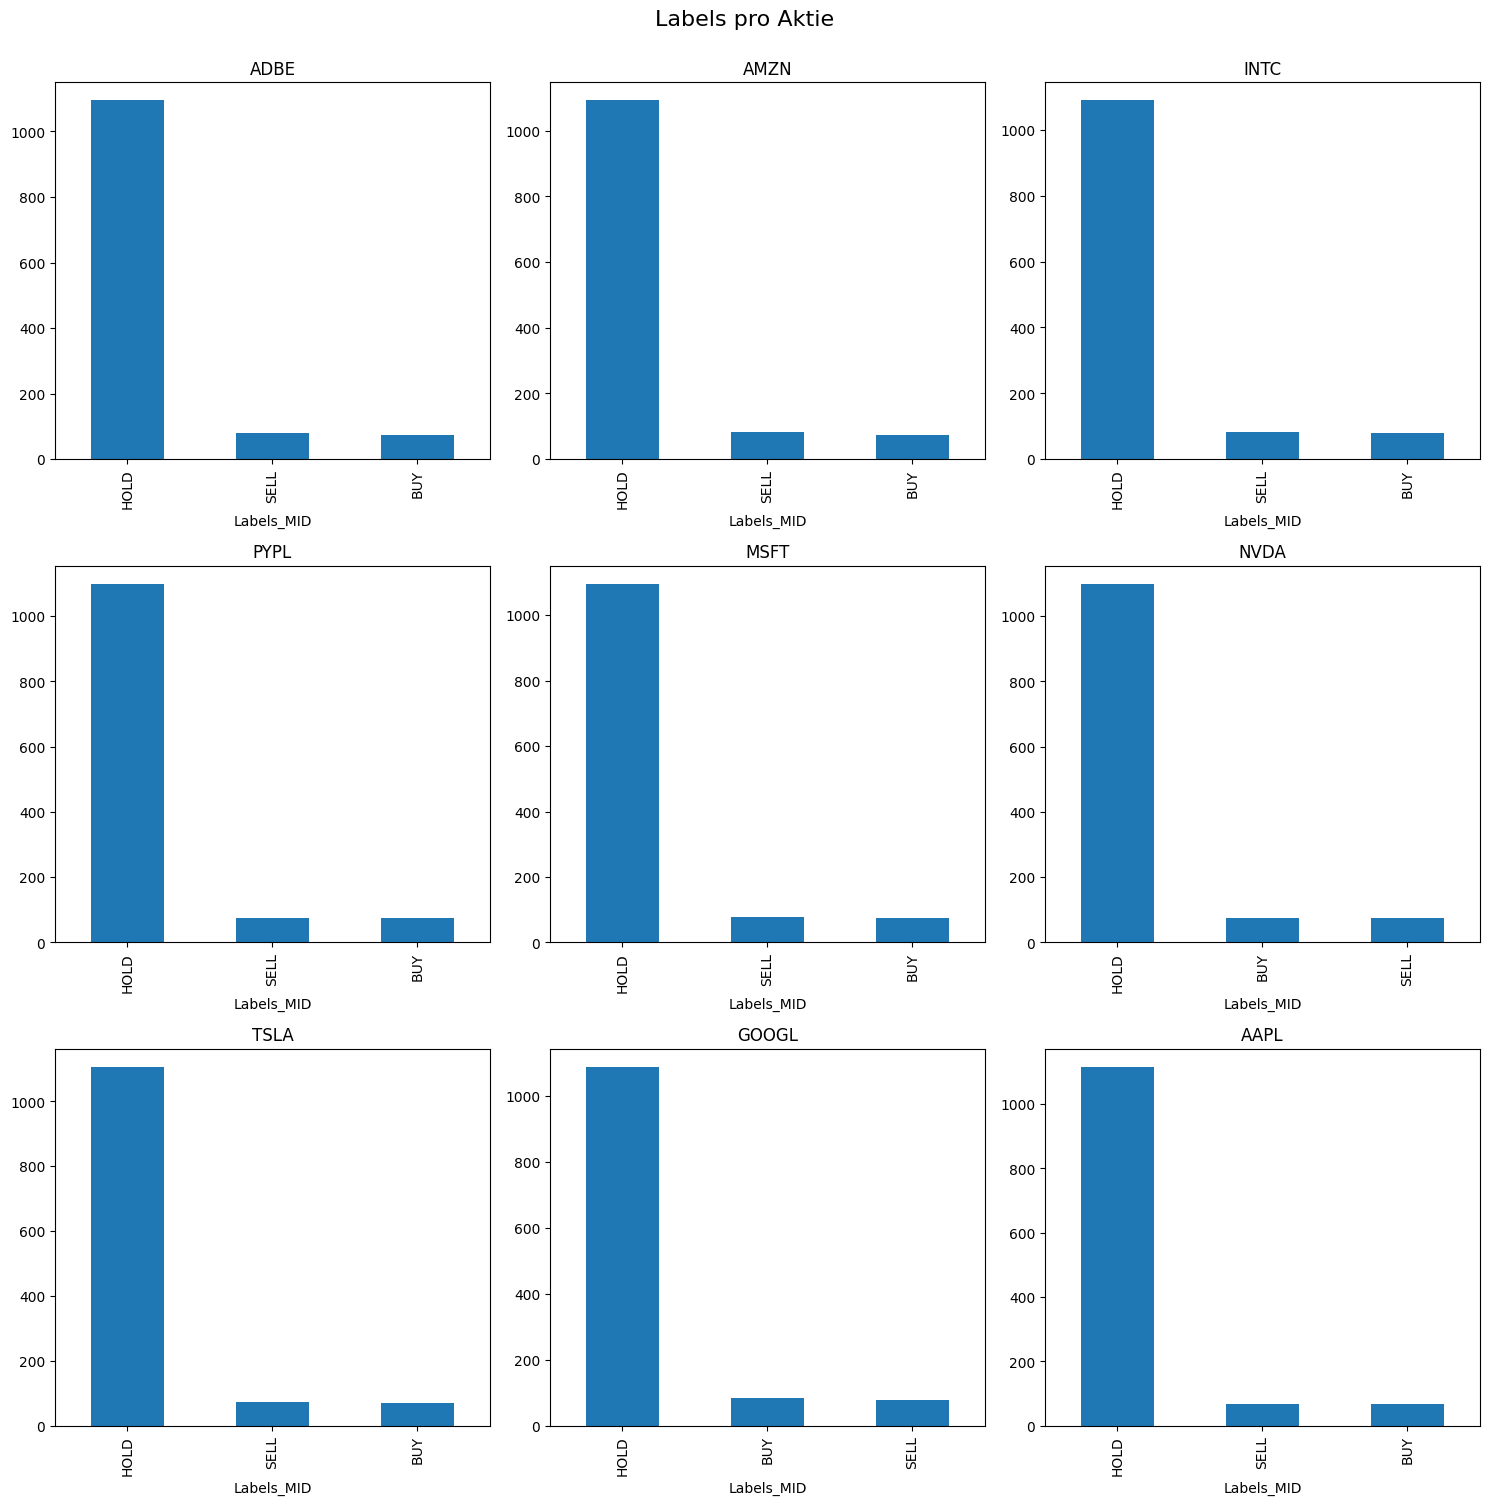

In [39]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()

for i, (stock, df) in enumerate(dataframes.items()):
    df['Labels_MID'].value_counts().plot(kind='bar', ax=axs[i], title=stock)

fig.suptitle('Labels pro Aktie', fontsize=16, y=1.0005)

plt.tight_layout()
plt.show()


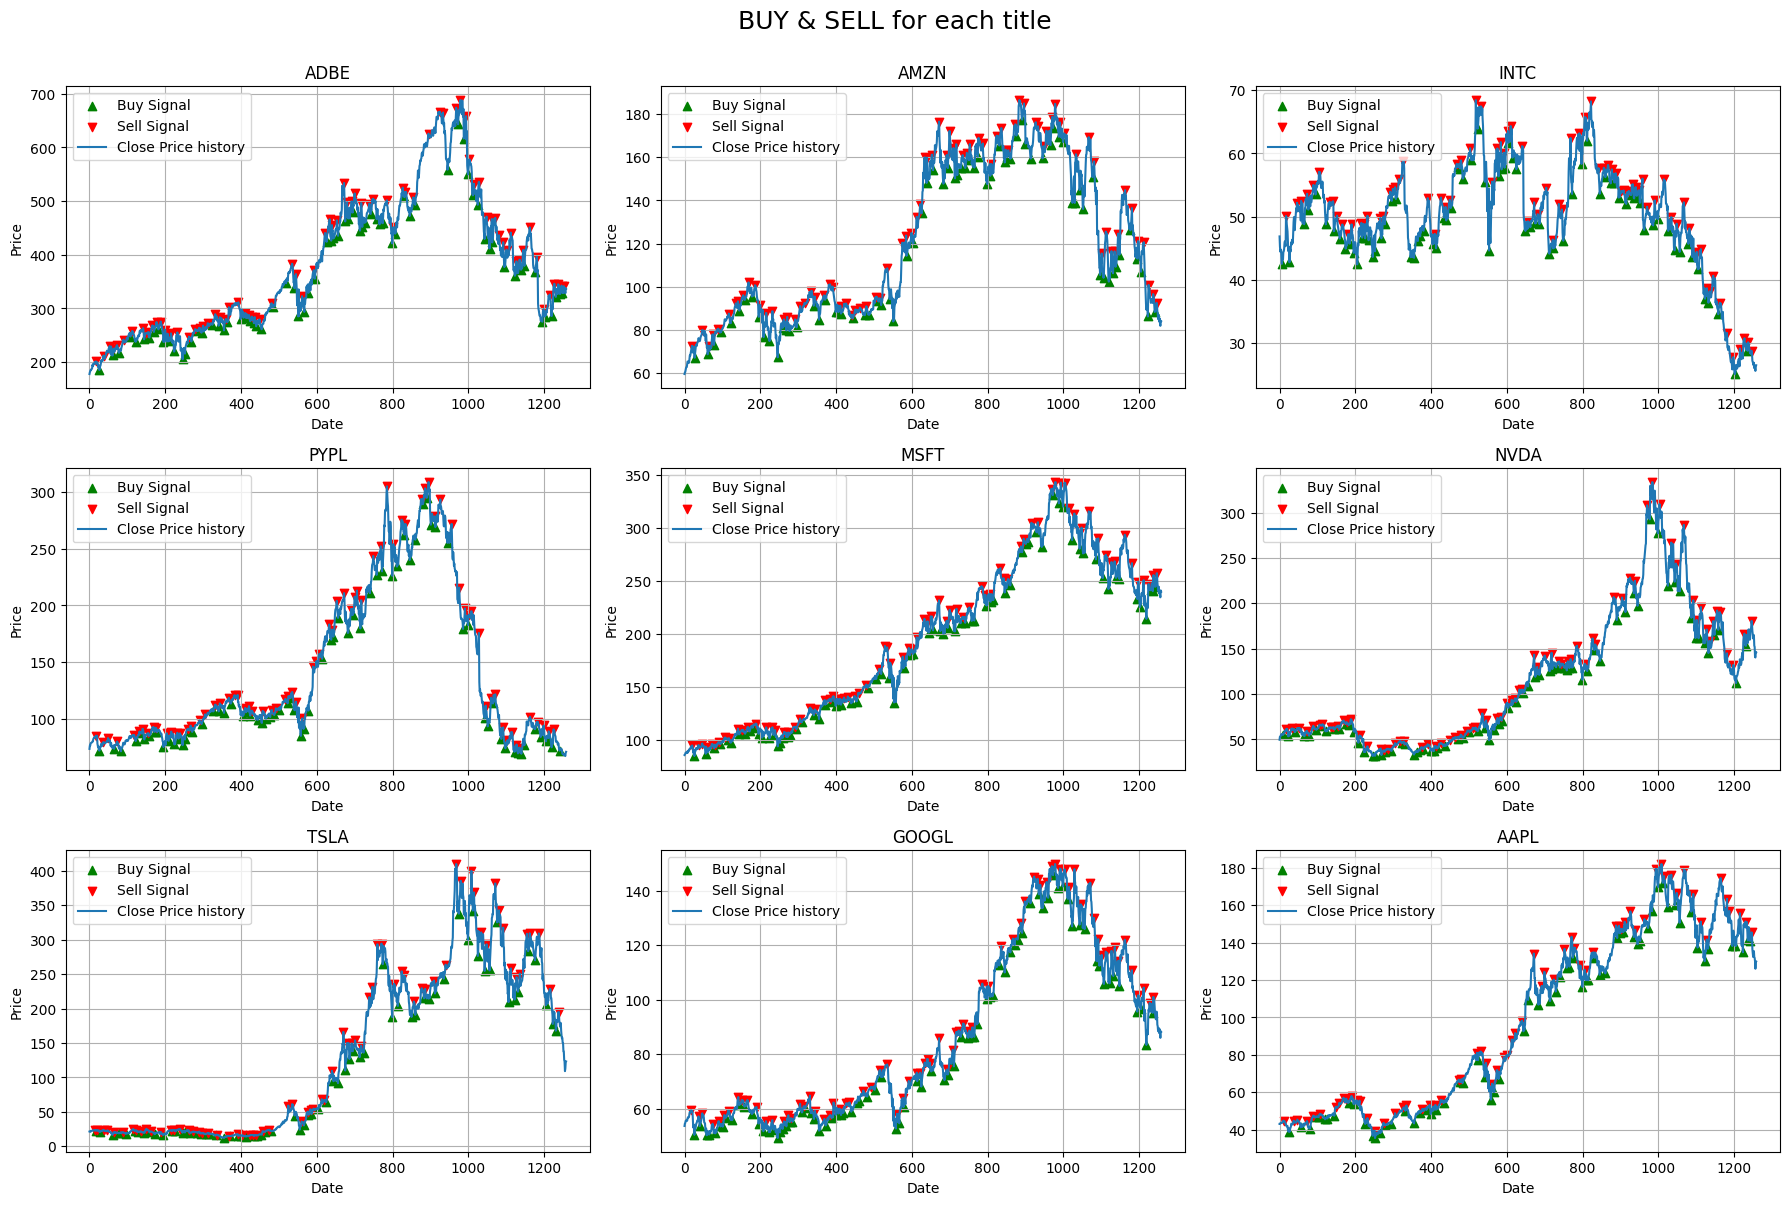

In [40]:
def plot_stock_price(dataframes):
    num_plots = len(dataframes)
    num_rows = (num_plots + 2) // 3 

    fig, axs = plt.subplots(num_rows, 3, figsize=(18, 4 * num_rows))
    axs = axs.flatten()

    for i, (stock_name, df) in enumerate(dataframes.items()):
        ax = axs[i]
        buy = df[df['Labels_MID'] == 'BUY']
        sell = df[df['Labels_MID'] == 'SELL']
        ax.scatter(buy.index, buy['Close'], color='g', label='Buy Signal', marker='^', alpha=1)
        ax.scatter(sell.index, sell['Close'], color='r', label='Sell Signal', marker='v', alpha=1)

        ax.plot(df['Close'], label='Close Price history')
        ax.set_title(f'{stock_name}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.legend(loc='upper left')
        ax.grid()
        fig.suptitle('BUY & SELL for each title', fontsize=18, y=1.0005)


    plt.tight_layout()
    plt.show()

# Aufruf der Funktion
plot_stock_price(dataframes)


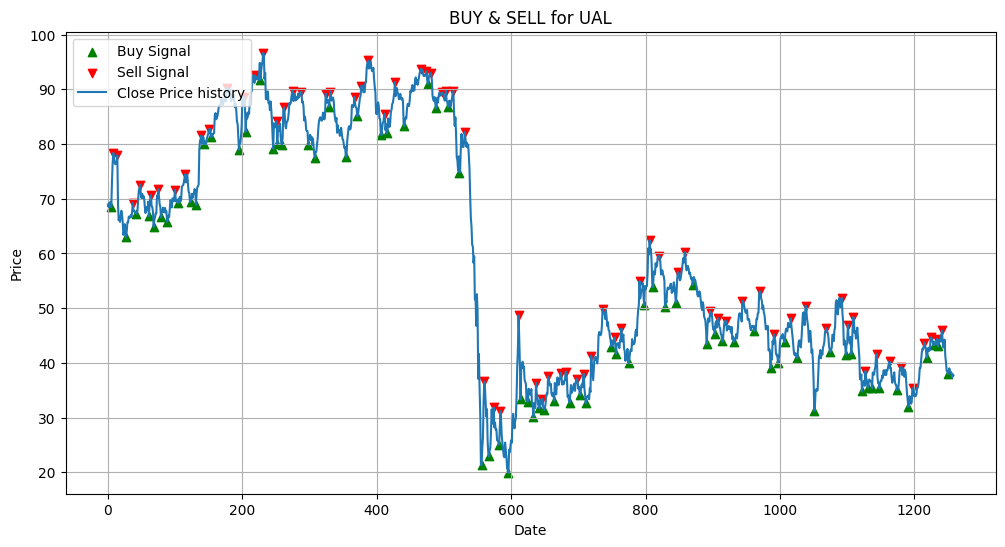

In [38]:
# function to create a single plot

def plot_single_stock_price(stock_name):
    df = dataframes[stock_name]
    fig, ax = plt.subplots(figsize=(12, 6))
    buy = df[df['Labels_MID'] == 'BUY']
    sell = df[df['Labels_MID'] == 'SELL']
    ax.scatter(buy.index, buy['Close'], color='g', label='Buy Signal', marker='^', alpha=1)
    ax.scatter(sell.index, sell['Close'], color='r', label='Sell Signal', marker='v', alpha=1)

    ax.plot(df['Close'], label='Close Price history')
    ax.set_title(f'BUY & SELL for {stock_name}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='upper left')
    ax.grid()
    plt.show()

# Aufruf der Funktion
plot_single_stock_price('UAL')


## Feature Engineering

The reason behind having this step in our pipeline is that Feature engineering involves creating, transforming, or selecting the most relevant variables in your dataset to improve model performance. This process is critical because it enables the model to learn from the data more effectively, leading to better predictions and insights. Feature selection, in particular, trims down the feature set to keep only the most valuable attributes, reducing complexity, computation time, and the risk of overfitting. In essence, these techniques streamline the modelling process, making it more accurate, interpretable, and efficient, while also saving time and resources.
First, we Normalize our data set because Normalizing a dataset is crucial to ensure that all features are on a consistent scale, preventing one feature from dominating the analysis, improving model convergence, aiding in the interpretation of feature importance, making distance-based algorithms more reliable, and aligning with assumptions of regularisation techniques, all of which contribute to more effective and robust data analysis and machine learning.
Then we will just apply a small filter of variance with a threshold of 0.1 i.e. any feature which has a variance less than or equal to 0.1 will be removed from the dataset as having this low variance does not contribute much to detecting the trend in the dataset.

### Cleaning individual dataframes

In [39]:
# Drop the NaN values and 0.00 from the dataframe
for i in dataframes:
    dataframes[i].dropna(inplace=True)
    dataframes[i] = dataframes[i][dataframes[i]['Close'] != 0.00]

### Merge the dataframes

In [40]:
# merge the dataframes to one dataframe
# save it as a csv file
merged_df = pd.concat(dataframes)
merged_df = merged_df.set_index('Date')
merged_df.to_csv('merged_data/merged_data_large.csv')


### Encode the labels

In [41]:
# Encode the labels
# Manual encoding

merged_df['Labels_MID'] = merged_df['Labels_MID'].replace('BUY', 0)
merged_df['Labels_MID'] = merged_df['Labels_MID'].replace('SELL', 1)
merged_df['Labels_MID'] = merged_df['Labels_MID'].replace('HOLD', 2)

### Calculation of possible amount of features

In [42]:
# Function to calculate the number of features

def calc_feature_number(features):
    features = len(features)
    return np.floor(np.sqrt(features)).astype(int)

In [43]:
list_features = list(merged_df.loc[:, 'Open':'adx_neg_21'].columns)
print('Total number of features: ', len(list_features))
print('Largest number of features that can be used in the model: ', calc_feature_number(list_features))
print(f"k = {calc_feature_number(list_features)**2}")

Total number of features:  147
Largest number of features that can be used in the model:  12
k = 144


### Train - Valid - Test Split and Normalization

In [44]:
### just copied from: https://towardsdatascience.com/stock-market-action-prediction-with-convnet-8689238feae3
### needs to be reworked and adapted to the features we want to use
### create function for this


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from collections import Counter

df = merged_df.dropna()

list_features = list(df.loc[:, 'Open':'adx_neg_21'].columns)  # needs to be changed to the features you want to use
print('Total number of features', len(list_features))
x_train, x_test, y_train, y_test = train_test_split(df.loc[:, 'Open':'adx_neg_21'], df['Labels_MID'], train_size=0.8, 
                                                    test_size=0.2, random_state=2, shuffle=True, stratify=df['Labels_MID'])

train_split = 0.8

print('train_split =',train_split)
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, train_size=train_split, test_size=1-train_split, 
                                                random_state=2, shuffle=True, stratify=y_train)
mm_scaler = MinMaxScaler(feature_range=(0, 1)) # or StandardScaler?
x_train = mm_scaler.fit_transform(x_train)
x_cv = mm_scaler.transform(x_cv)
x_test = mm_scaler.transform(x_test)

print("Shape of x, y train/cv/test {} {} {} {} {} {}".format(x_train.shape, y_train.shape, x_cv.shape, y_cv.shape, x_test.shape, y_test.shape))

# save the scaler
import joblib
joblib.dump(mm_scaler, 'models/scaler.pkl')



Total number of features 147
train_split = 0.8
Shape of x, y train/cv/test (322420, 147) (322420,) (80605, 147) (80605,) (100757, 147) (100757,)


['models/scaler.pkl']

# Feature Selection

Now the main part is that we will calculate the importance of each feature by using Random Forest Classifier and then reduce the feature size to 81.

A rough idea of how random forest works is for each decision point (split) in each tree, the Random Forest algorithm measures the decrease in impurity(Gini impurity) resulting from the split. The impurity reduction brought about by each feature is averaged across all the trees in the forest. Features that consistently reduce impurity more effectively when used in splits are considered more important

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [46]:
from sklearn.feature_selection import SelectKBest, chi2

# Anwenden der Feature Selection mit SelectKBest und Chi-Quadrat-Test
k = 100  # Anzahl der gewünschten Merkmale
selector = SelectKBest(chi2, k=k)
X_new = selector.fit_transform(x_train, y_train)

# Index der ausgewählten Merkmale
selected_feature_indices = selector.get_support(indices=True)

# Ausgabe der Indizes der ausgewählten Merkmale
print("Indizes der ausgewählten Merkmale:")
print(selected_feature_indices)

Indizes der ausgewählten Merkmale:
[  0   1   2   3   4   5  24  25  26  27  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  69  70  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  98  99 100 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 130 131
 133 134 136 137 139 140 142 143 145 146]


In [47]:
len(selected_feature_indices)

100

In [48]:
# only use the selected features
x_train = x_train[:, selected_feature_indices]
x_cv = x_cv[:, selected_feature_indices]
x_test = x_test[:, selected_feature_indices]

## Feature Importamce in Prediction

Used mutual info classification for creating heat map for our image. Basically it tells us which part of the image is most useful to the model (will explain this part more in further ). (https://medium.com/@quantclubiitkgp/stock-buy-sell-hold-prediction-using-cnn-ee7b671f4ad3)

> keine Ahnung was er damit meint und warum er das macht??!

## Image Creation

In [49]:
# Function to reshape the data
# Creates a 3D array (x, y and images for each row) for the CNN

def reshape_as_image(x, img_width, img_height):
    x_temp = np.zeros((len(x), img_height, img_width))
    for i in range(x.shape[0]):
        # print(type(x), type(x_temp), x.shape)
        x_temp[i] = np.reshape(x[i], (img_height, img_width))

    return x_temp

In [50]:
dim = int(np.sqrt(k))
x_train = reshape_as_image(x_train, dim, dim)
x_cv = reshape_as_image(x_cv, dim, dim)
x_test = reshape_as_image(x_test, dim, dim)
# adding a 1-dim for channels (3)
x_train = np.stack((x_train,) * 3, axis=-1)
x_test = np.stack((x_test,) * 3, axis=-1)
x_cv = np.stack((x_cv,) * 3, axis=-1)

print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of x_cv: {x_cv.shape}')
print(f'Shape of x_test: {x_test.shape}')




Shape of x_train: (322420, 10, 10, 3)
Shape of x_cv: (80605, 10, 10, 3)
Shape of x_test: (100757, 10, 10, 3)


In [51]:
x_train.shape

(322420, 10, 10, 3)

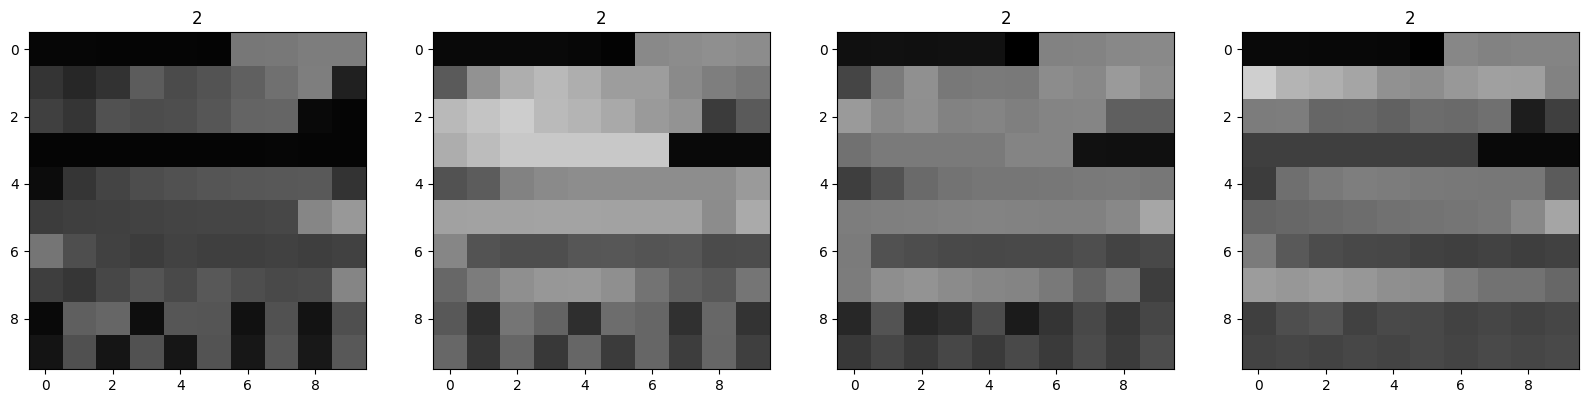

In [52]:
# Subplot with 4 plots in a row with random data

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for i in range(4):
    index = np.random.randint(0, x_train.shape[0])
    ax[i].imshow(x_train[index])
    ax[i].set_title(y_train[index])
plt.show()


## CNN

In [53]:
# compute class weights
counter = Counter(y_train)
max_val = float(max(counter.values()))
class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()}
print('Class weights: ', class_weights)


Class weights:  {2: 1.0, 1: 14.317560728744938, 0: 14.328437579133958}


In [95]:
# a simple CNN model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'],)


history = model.fit(x_train, y_train,
                    validation_data=(x_cv, y_cv),
                    epochs=100,
                    class_weight={0: class_weights[0], 1: class_weights[1], class_weights[2]: 2})

# save the model
#model.save('models/stock_prediction_model.h5')


Epoch 1/100
 3943/10076 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6662 - loss: 1.2093

KeyboardInterrupt: 

In [94]:
import tensorflow as tf
from tensorflow import keras
#early stopping
from keras.callbacks import EarlyStopping

model = tf.keras.models.Sequential()

# 1st convolutional layer
model.add(tf.keras.layers.Conv2D(16, (2, 2), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

# 2nd convolutional layer
model.add(tf.keras.layers.Conv2D(32, (2, 2), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

# 3rd convolutional layer
model.add(tf.keras.layers.Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

# FFNN
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(3, activation='sigmoid'))

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

from keras.utils import to_categorical

# Wandele die Zielwerte in das One-Hot-Encoding-Format um
y_train_encoded = to_categorical(y_train, num_classes=3)
y_cv_encoded = to_categorical(y_cv, num_classes=3)

history = model.fit(x_train, y_train_encoded,
                    validation_data=(x_cv, y_cv_encoded),
                    epochs=200,
                    callbacks=[early_stopping])


Epoch 1/200
10076/10076 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.8612 - loss: 0.2661 - val_accuracy: 0.8775 - val_loss: 0.2209
Epoch 2/200
10076/10076 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.8770 - loss: 0.2257 - val_accuracy: 0.8775 - val_loss: 0.2149
Epoch 3/200
10076/10076 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.8766 - loss: 0.2241 - val_accuracy: 0.8775 - val_loss: 0.2187
Epoch 4/200
10076/10076 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.8766 - loss: 0.2221 - val_accuracy: 0.8775 - val_loss: 0.2142
Epoch 5/200
 6133/10076 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8769 - loss: 0.2213

KeyboardInterrupt: 

In [69]:
# calc the percentage of label 2 in validation data
print('Percentage of label 2 (HOLD) in validation data: ', Counter(y_cv)[2] / len(y_cv) * 100)

Percentage of label 2 (HOLD) in validation data:  87.77648428405122


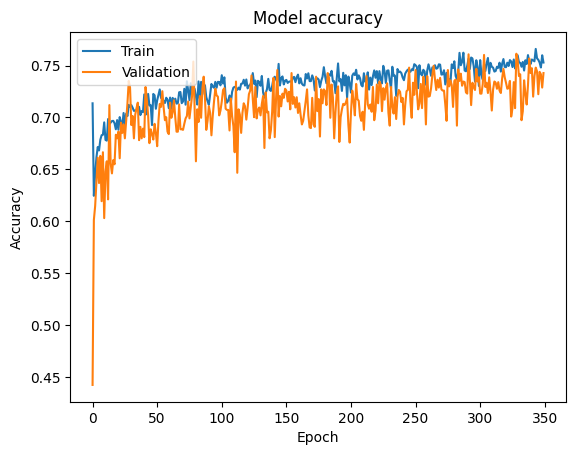

In [73]:
# plot the histrory of the model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


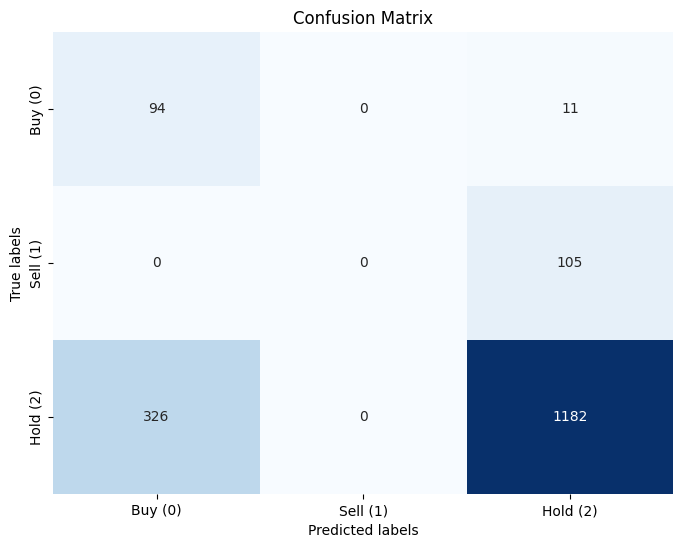

In [71]:
# ToDo: Checken!! Made with ChatGPT!!


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Vorhersagen für Validierungsdaten machen
y_pred = model.predict(x_cv)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix berechnen
conf_matrix = confusion_matrix(y_cv, y_pred_classes)

# Confusion Matrix plotten
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Buy (0)', 'Sell (1)', 'Hold (2)'], 
            yticklabels=['Buy (0)', 'Sell (1)', 'Hold (2)'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [72]:
# calculate the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_cv, y_pred_classes)
print('Accuracy on validation data: ', accuracy)


Accuracy on validation data:  0.7427240977881258


## Trading Bot Implementation

for day in 2023:

stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'PYPL', 'INTC', 'ADBE']

1.1.23

predictions = [[0.5, 0.6, 0.7],[0.5, 0.6, 0.7],[0.5, 0.6, 0.7],[0.5, 0.6, 0.7]]

bot


